In [1]:
import pandas as pd

matches = pd.read_csv("matches_3classes.csv", index_col=0)
#matches.head()

In [2]:
predictors = ["venue_code", "opp_code", "hour", "day_code"]

train = matches[matches["date"] < '2024-01-01']
#train.reset_index(drop=True)
test = matches[matches["date"] > '2024-01-01']
#test.reset_index(drop=True)

In [3]:
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import (confusion_matrix,
                             accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                            )

In [4]:
dt = DecisionTreeClassifier(**{'criterion': 'gini', 
                               'max_depth': 4})

rf = RandomForestClassifier(**{'max_depth': 15, 'max_features': 16, 
                               'min_samples_leaf': 7, 'min_samples_split': 16, 
                               'n_estimators': 391, 'random_state': 1})

svc = SVC(**{'C': 96.66964393682444, 
             'gamma': 52.629165518744415, 
             'kernel': 'linear', 
             'random_state': 1})

lr = LogisticRegression(**{'class_weight': {0: 1, 1: 1}, 
                           'max_iter': 1000, 
                           'penalty': 'l2', 
                           'random_state': 3, 
                           'solver': 'liblinear'})

knn = KNeighborsClassifier(**{'n_neighbors': 28})

xgb = GradientBoostingClassifier(**{'learning_rate': 0.1, 
                                    'max_depth': 4, 'max_features': 4, 
                                    'min_samples_leaf': 7, 
                                    'min_samples_split': 93, 
                                    'n_estimators': 806, 
                                    'random_state': 1, 
                                    'subsample': 0.5})

cb = CatBoostClassifier(**{'depth': 5, 
                           'learning_rate': 0.014078547390731052, 
                           'n_estimators': 661, 
                           'random_state': 3, 
                           'verbose': 2})



In [5]:
models = [dt, rf, svc, lr, knn, xgb, cb]
models_name = ['dt', 'rf', 'svc', 'lr', 'knn', 'xgb', 'cb']

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing

In [7]:
matches_scaled = matches.copy()
matches_scaled[predictors] = preprocessing.scale(matches_scaled[predictors]) 

train_scaled = matches_scaled[matches_scaled["date"] < '2024-01-01']
test_scaled = matches_scaled[matches_scaled["date"] > '2024-01-01']

In [8]:
def evaluation_(models):
    accuracy = []
    precision = []
    recall = []
    f1score = []
    for model in models:
        if model in [svc, lr, knn]:          
            model.fit(train_scaled[predictors], train_scaled['target'])
            preds = model.predict(test_scaled[predictors])
            accuracy.append(accuracy_score(test_scaled["target"], preds))
            precision.append(precision_score(test_scaled["target"], preds, average='weighted', zero_division=0))
            recall.append(recall_score(test_scaled["target"], preds, average='weighted', zero_division=0))
            f1score.append(f1_score(test_scaled["target"], preds, average='weighted', zero_division=0))
            
            continue
        else:
            model.fit(train[predictors], train['target'])
            preds = model.predict(test[predictors])
            accuracy.append(accuracy_score(test["target"], preds))
            precision.append(precision_score(test["target"], preds, average='weighted', zero_division=0))
            recall.append(recall_score(test["target"], preds, average='weighted', zero_division=0))
            f1score.append(f1_score(test["target"], preds, average='weighted', zero_division=0))
    return accuracy, precision, recall, f1score
        
accuracy, precision, recall, f1score = evaluation_(models)

0:	learn: 1.0970274	total: 104ms	remaining: 1m 8s
2:	learn: 1.0934348	total: 105ms	remaining: 23.1s
4:	learn: 1.0897113	total: 106ms	remaining: 13.9s
6:	learn: 1.0862910	total: 107ms	remaining: 10s
8:	learn: 1.0827386	total: 108ms	remaining: 7.84s
10:	learn: 1.0792587	total: 109ms	remaining: 6.45s
12:	learn: 1.0759288	total: 110ms	remaining: 5.5s
14:	learn: 1.0721174	total: 111ms	remaining: 4.8s
16:	learn: 1.0688052	total: 113ms	remaining: 4.26s
18:	learn: 1.0657876	total: 113ms	remaining: 3.83s
20:	learn: 1.0622677	total: 114ms	remaining: 3.49s
22:	learn: 1.0596039	total: 115ms	remaining: 3.2s
24:	learn: 1.0567115	total: 116ms	remaining: 2.96s
26:	learn: 1.0538244	total: 117ms	remaining: 2.76s
28:	learn: 1.0510040	total: 119ms	remaining: 2.58s
30:	learn: 1.0488851	total: 119ms	remaining: 2.43s
32:	learn: 1.0466616	total: 120ms	remaining: 2.29s
34:	learn: 1.0444780	total: 121ms	remaining: 2.17s
36:	learn: 1.0423144	total: 122ms	remaining: 2.06s
38:	learn: 1.0402410	total: 123ms	remaini

432:	learn: 0.8931789	total: 288ms	remaining: 152ms
434:	learn: 0.8926482	total: 290ms	remaining: 150ms
436:	learn: 0.8921538	total: 291ms	remaining: 149ms
438:	learn: 0.8916999	total: 291ms	remaining: 147ms
440:	learn: 0.8911408	total: 292ms	remaining: 146ms
442:	learn: 0.8909874	total: 293ms	remaining: 144ms
444:	learn: 0.8903971	total: 294ms	remaining: 143ms
446:	learn: 0.8899760	total: 295ms	remaining: 141ms
448:	learn: 0.8895627	total: 296ms	remaining: 140ms
450:	learn: 0.8891129	total: 297ms	remaining: 138ms
452:	learn: 0.8886624	total: 298ms	remaining: 137ms
454:	learn: 0.8881744	total: 298ms	remaining: 135ms
456:	learn: 0.8876423	total: 299ms	remaining: 134ms
458:	learn: 0.8871636	total: 300ms	remaining: 132ms
460:	learn: 0.8866123	total: 301ms	remaining: 131ms
462:	learn: 0.8861024	total: 302ms	remaining: 129ms
464:	learn: 0.8854738	total: 303ms	remaining: 128ms
466:	learn: 0.8848830	total: 304ms	remaining: 126ms
468:	learn: 0.8845074	total: 305ms	remaining: 125ms
470:	learn: 

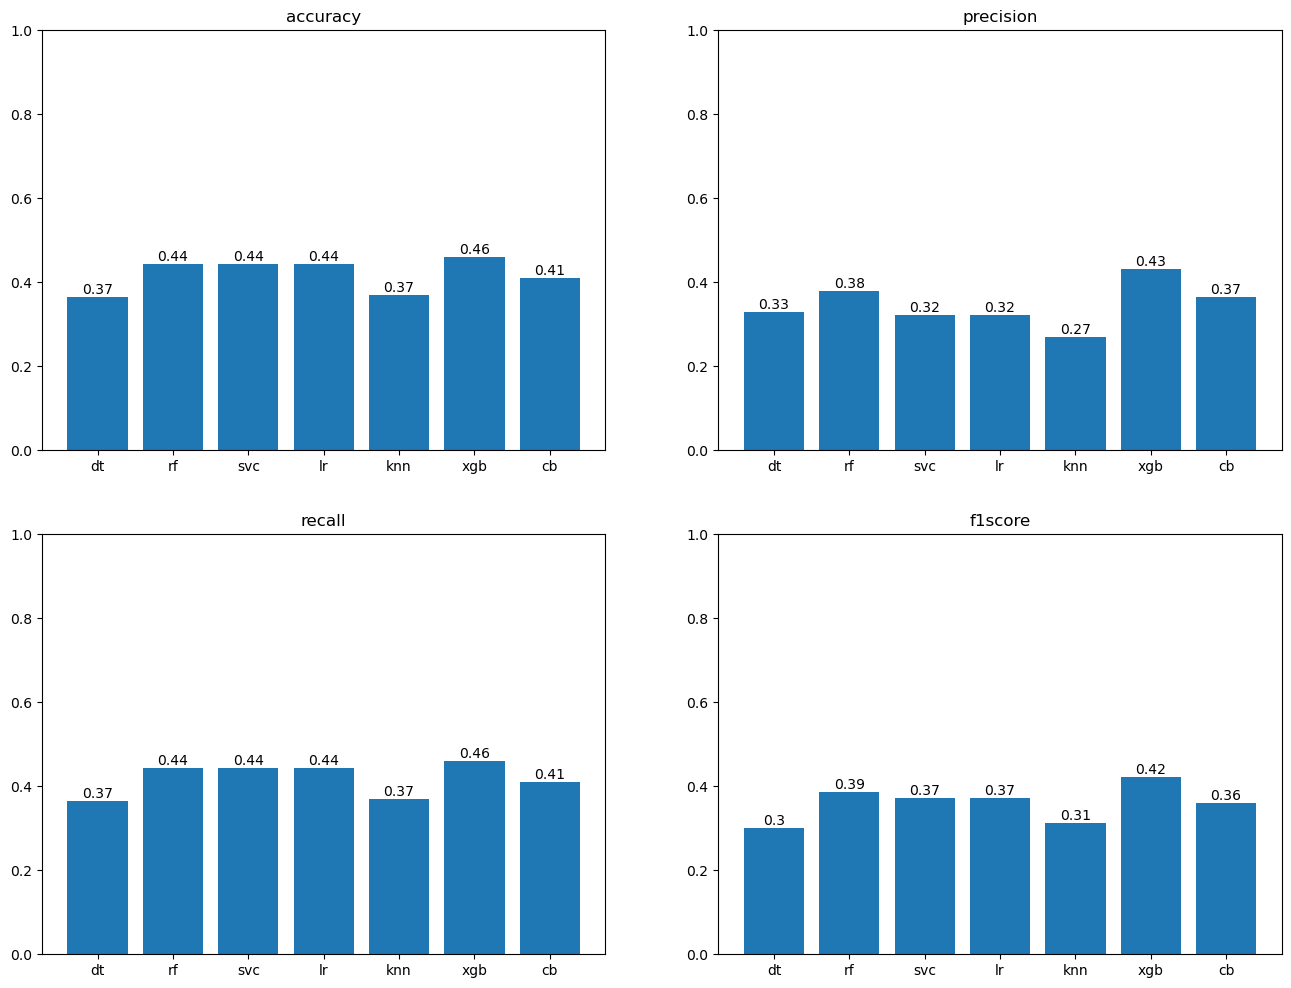

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

ax = ax.flatten()

score = [accuracy, precision, recall, f1score]
score_name = ['accuracy', 'precision', 'recall', 'f1score']

for i in range(len(ax)):
    ax[i].bar(models_name, score[i])
    ax[i].set_title(score_name[i])
    ax[i].set_ylim([0, 1])
    for j, v in enumerate(score[i]):
        ax[i].text(j, v, str(round(v, 2)), ha='center', va='bottom')


In [10]:
matches = pd.read_csv("matches_3classes_rolling.csv", index_col=0)

train = matches[matches["date"] < '2024-01-01']
#train.reset_index(drop=True)
test = matches[matches["date"] > '2024-01-01']
#test.reset_index(drop=True)

cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]
new_cols = [f"{c}_rolling" for c in cols]

predictors += new_cols

In [11]:
matches_scaled = matches.copy()
matches_scaled[predictors] = preprocessing.scale(matches_scaled[predictors]) 

train_scaled = matches_scaled[matches_scaled["date"] < '2024-01-01']
test_scaled = matches_scaled[matches_scaled["date"] > '2024-01-01']

In [12]:
dt = DecisionTreeClassifier(**{'criterion': 'entropy', 
                               'max_depth': 5})

rf = RandomForestClassifier(**{'max_depth': 5, 'max_features': 12, 
                               'min_samples_leaf': 7, 'min_samples_split': 14, 
                               'n_estimators': 865, 
                               'random_state': 4})

svc = SVC(**{'C': 96.73712975691015, 
             'gamma': 65.52467019338333, 
             'kernel': 'linear', 
             'random_state': 3})

lr = LogisticRegression(**{'class_weight': {0: 2, 1: 1, 2: 2}, 
                           'max_iter': 1000, 
                           'penalty': 'l1', 
                           'random_state': 2, 
                           'solver': 'liblinear'}
                       )

knn = KNeighborsClassifier(**{'n_neighbors': 29})

xgb = GradientBoostingClassifier(**{'learning_rate': 0.1, 
                                    'max_depth': 6, 'max_features': 7, 
                                    'min_samples_leaf': 9, 'min_samples_split': 25, 
                                    'n_estimators': 256, 
                                    'random_state': 4, 
                                    'subsample': 0.5})

cb = CatBoostClassifier(**{'depth': 4, 
                           'learning_rate': 0.030855479723730178, 
                           'n_estimators': 473, 
                           'random_state': 1, 
                           'verbose': 2})

In [13]:
models = [dt, rf, svc, lr, knn, xgb, cb]
models_name = ['dt', 'rf', 'svc', 'lr', 'knn', 'xgb', 'cb']

In [14]:
accuracy, precision, recall, f1score = evaluation_(models)

0:	learn: 1.0930424	total: 1.02ms	remaining: 483ms
2:	learn: 1.0828569	total: 3.06ms	remaining: 479ms
4:	learn: 1.0735929	total: 4.99ms	remaining: 467ms
6:	learn: 1.0647023	total: 6.76ms	remaining: 450ms
8:	learn: 1.0566637	total: 8.57ms	remaining: 442ms
10:	learn: 1.0499949	total: 10.3ms	remaining: 435ms
12:	learn: 1.0428628	total: 11.9ms	remaining: 422ms
14:	learn: 1.0358156	total: 13.8ms	remaining: 420ms
16:	learn: 1.0294007	total: 15.7ms	remaining: 420ms
18:	learn: 1.0217433	total: 17.4ms	remaining: 416ms
20:	learn: 1.0161406	total: 19.2ms	remaining: 414ms
22:	learn: 1.0114335	total: 20.9ms	remaining: 409ms
24:	learn: 1.0073427	total: 22.8ms	remaining: 408ms
26:	learn: 1.0026044	total: 24.4ms	remaining: 403ms
28:	learn: 0.9991758	total: 26ms	remaining: 398ms
30:	learn: 0.9955438	total: 27.8ms	remaining: 396ms
32:	learn: 0.9916301	total: 29.5ms	remaining: 393ms
34:	learn: 0.9877411	total: 31.3ms	remaining: 392ms
36:	learn: 0.9833722	total: 32.9ms	remaining: 388ms
38:	learn: 0.979379

448:	learn: 0.6536709	total: 377ms	remaining: 20.2ms
450:	learn: 0.6527292	total: 379ms	remaining: 18.5ms
452:	learn: 0.6518031	total: 381ms	remaining: 16.8ms
454:	learn: 0.6499764	total: 382ms	remaining: 15.1ms
456:	learn: 0.6492591	total: 384ms	remaining: 13.4ms
458:	learn: 0.6480307	total: 385ms	remaining: 11.8ms
460:	learn: 0.6468141	total: 387ms	remaining: 10.1ms
462:	learn: 0.6456028	total: 388ms	remaining: 8.39ms
464:	learn: 0.6441765	total: 390ms	remaining: 6.71ms
466:	learn: 0.6430637	total: 392ms	remaining: 5.03ms
468:	learn: 0.6417323	total: 394ms	remaining: 3.36ms
470:	learn: 0.6406824	total: 395ms	remaining: 1.68ms
472:	learn: 0.6400827	total: 397ms	remaining: 0us


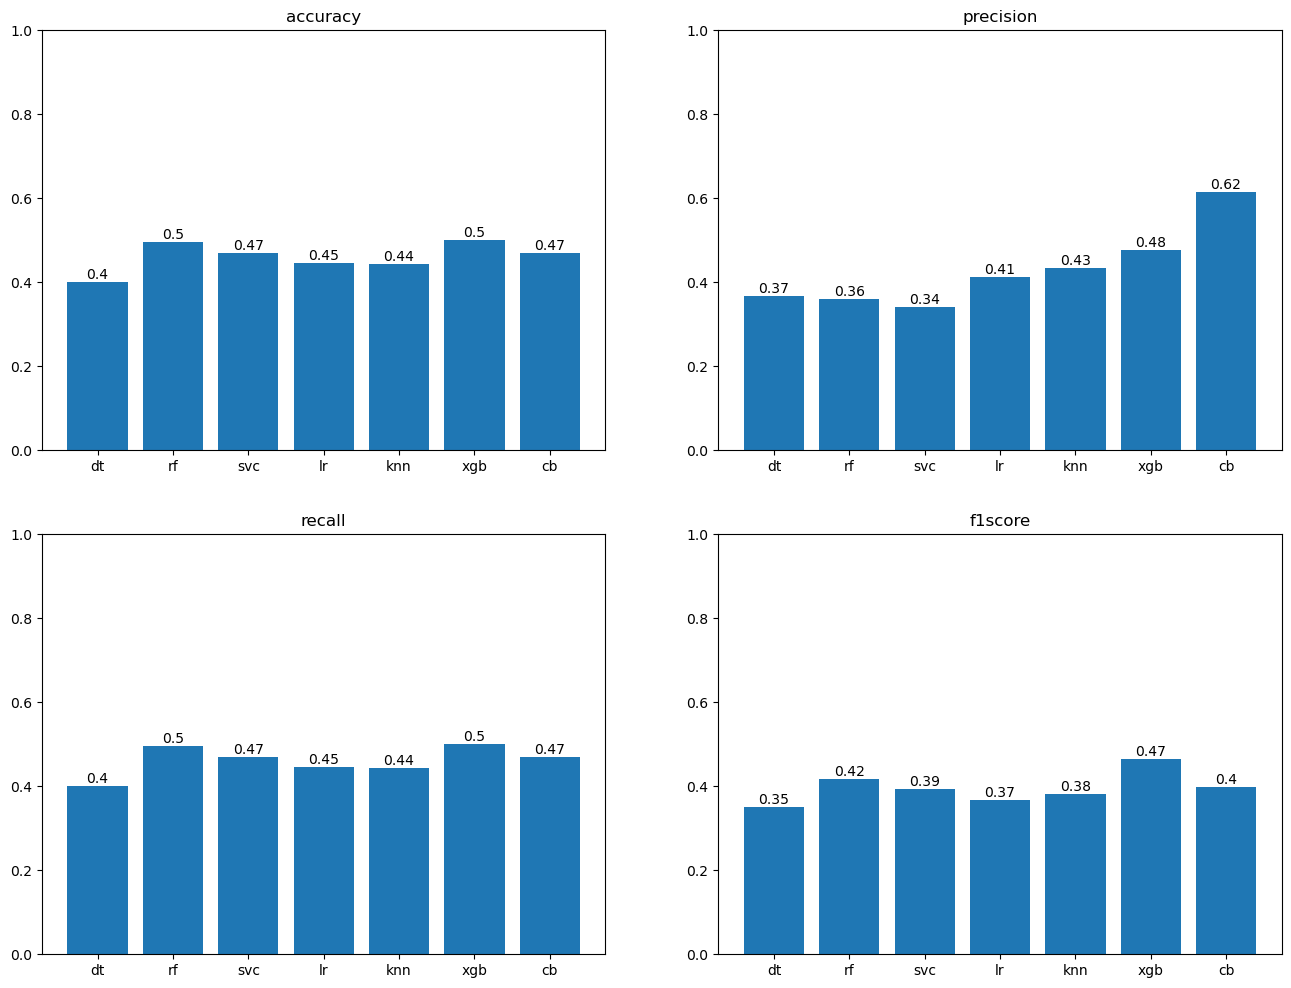

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

ax = ax.flatten()

score = [accuracy, precision, recall, f1score]
score_name = ['accuracy', 'precision', 'recall', 'f1score']

for i in range(len(ax)):
    ax[i].bar(models_name, score[i])
    ax[i].set_title(score_name[i])
    ax[i].set_ylim([0, 1])
    for j, v in enumerate(score[i]):
        ax[i].text(j, v, str(round(v, 2)), ha='center', va='bottom')